# Iris Flower Classification

### Table of Content
<ol>
    <strong>
    <li>Problem Definition</li>
    <li>Data</li>
    <li>Evaluation</li>
    <li>Featuring</li>
    <li>Modeling</li>
    <li>Results and Discussion</li>
    </strong>
</ol>

### 1. Problem Definition

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements.Now that we have the measurements of the iris flowers according to their species, the task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

This notebook will introduce some foundation machine learning and data science concepts by exploring the iris flower classification.

### 2. Data

<p>
This dataset provides information on different species of iris flowers. The original source data is gotten from Kaggle. The dataset can be downloaded
    <a href="https://www.kaggle.com/datasets/saurabh00007/iriscsv">HERE</a> </p>

### 3. Evaluation

The target of this project is to obtain at least a 95% accuracy in classifying the iris flowers from the measurements of their species.

### 4. Features

<p>
The following are the features that will be used to classify the iris flowers based on the measurement of their species.
    <ol>
        <li>SepalLengthCm - the length of the sepal</li>
        <li>SepalWidthCm - the width of the sepal</li>
        <li>PetalLengthCm - the length of the petal</li>
        <li>PetalWidthCm - the width of the petal</li>
        <li>Species - the 3 different species of the iris flower</li>

</ol>
</p>

#### Preparing the tools

The libraries used for this project and for almost every structured data project include, but not limited to;
<ul>
    <li>numpy - for numerical operations</li>
    <li>pandas - for data analysis</li>
    <li>matplotlib/seaborn - for plotting and data visualization</li>
    <li>scikitlearn - for machine learning modeling and evaluation</li>
 </ul>

In [1]:
# import all the tools that will be needed

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
# To visualize the plottings inside the notebook
%matplotlib inline 

# Label encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Model Evaluators
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

#### Load Data

In [2]:
# using the Id column as the index column
# number of columns will reduce from 6 to 5.
flowers = pd.read_csv('iris.csv', index_col = 'Id') 
flowers.head() # first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
flowers.tail() # last 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# number of rows and columns
flowers.shape

(150, 5)

#### Exploratory Data Analysis (EDA)

In [5]:
# Let's see how many sample of iris species that are in the dataset
flowers.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

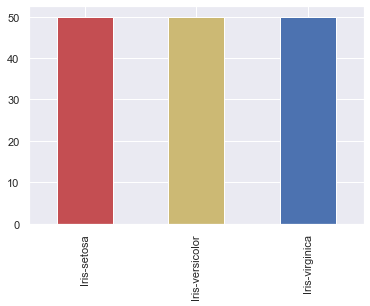

In [6]:
flowers['Species'].value_counts().plot(kind='bar', color=['r','y','b']);

In [7]:
flowers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [8]:
# checking for missing data
flowers.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
flowers.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# checking the correlation between the features
flowers.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


(4.5, -0.5)

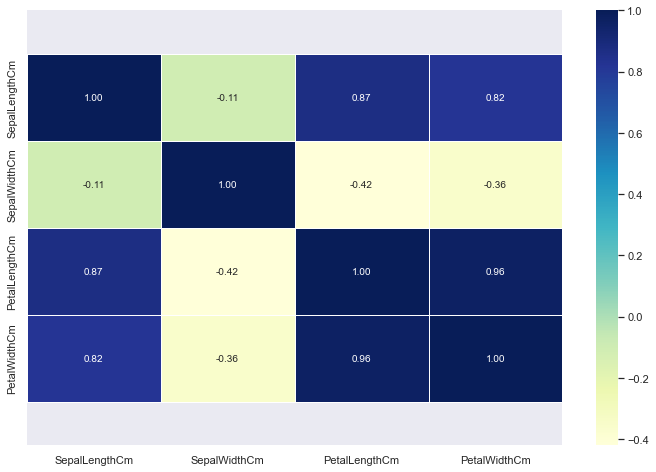

In [11]:
# visualizing the correlation matrix
corr_matrix = flowers.corr()
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths=0.5, 
                 fmt='.2f', cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### 5. Modeling

#### Data Preprocessing

In [12]:
# categorical column
cat_col = flowers.select_dtypes(include=['object', 'category']).columns
print(cat_col)

Index(['Species'], dtype='object')


In [13]:
# numerical column
num_col = [col for col in flowers.columns if col not in cat_col]
print(num_col)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


#### Label Encoding

In [14]:
# encodes the categorical column to numbers
le = LabelEncoder()
for i in cat_col:
    flowers[i] = le.fit_transform(flowers[i])

flowers.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [15]:
flowers['Species'].unique()

array([0, 1, 2])

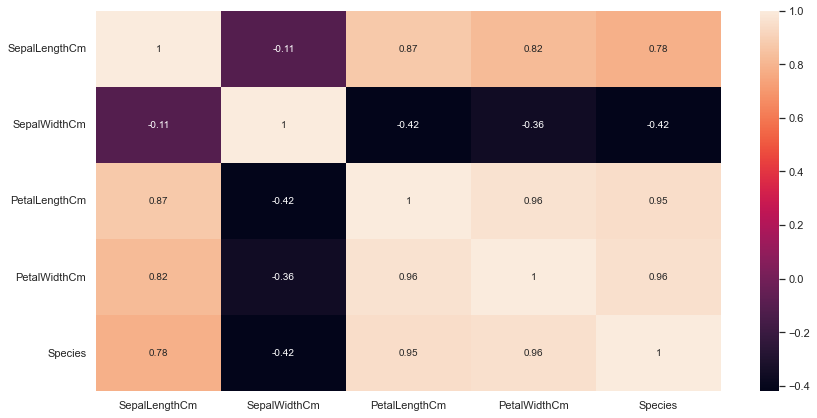

In [16]:
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.heatmap(flowers.corr(), annot=True)

In [17]:
# split the data into X and y
X = flowers.drop('Species', axis=1)
y = flowers['Species']

In [18]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [19]:
y

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int32

In [20]:
#splitting data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90, 4), (90,), (60, 4), (60,))

In [22]:
# putting the models in a dictionary / pipeline

models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
}

# setting up a function to fit and score model

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    fits and evaluates given machine learning models
    models: a dictionary of different scikitlearn machine learning models
    x_train: training data (no labels)
    x_test: testing data (no label)
    y_train: training labels
    y_test: testing labels
    '''
    
    # setting up a random seed
    np.random.seed(42)
    
    # making a dictionary to keep model scores
    model_scores = {}
    
    # looping through models
    for name, model in models.items():
        # fitting the model to the dataset
        model.fit(X_train, y_train) 
        # evaluating the model and appending its score  to model_scores
        model_scores[name] = model.score(X_test, y_test) 
    return model_scores

In [23]:
%%time
scores = fit_and_score(models=models,
                      X_train=X_train,
                      X_test=X_test,
                      y_train=y_train,
                      y_test=y_test)
scores

Wall time: 152 ms


{'Gaussian Naive Bayes': 0.9666666666666667,
 'Random Forest': 0.9833333333333333,
 'Logistic Regression': 1.0}

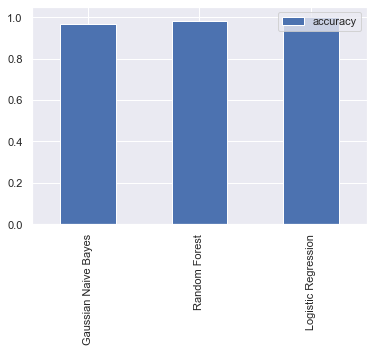

In [24]:
# Model Comparison
model_compare = pd.DataFrame(scores, index=['accuracy'])
model_compare.T.plot.bar(); # T means Transpose, so as to improve the plot

##### Out of the 3 machine learning model, Logistic Regression proves to be the best model for the iris flower classification.

In [25]:
%%time

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print(f'Accuracy score: {log_reg.score(X_test, y_test)*100}%')

Accuracy score: 100.0%
Wall time: 15.5 ms


In [26]:
# making predictions 

y_preds = log_reg.predict(X_test)

### 6. Results and Discussion

In [27]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [28]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[23  0  0]
 [ 0 19  0]
 [ 0  0 18]]


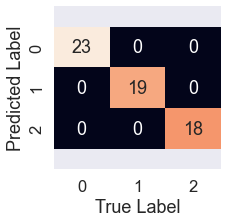

In [29]:
sns.set(font_scale=1.5)

# Plot a nice confusion matrix using seaborn's heatmap
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)

In [30]:
# comparing actual values with predicted values
Prediction = pd.DataFrame(data={"actual values": y_test,
                          "predictions": y_preds})
Prediction.head(10) # viewing 10 predictions

,actual values,predictions
Id,,
74,1,1
19,0,0
119,2,2
79,1,1
77,1,1
32,0,0
65,1,1
142,2,2
69,1,1


#### Hyperparameter Tuning

In [31]:
# create hyperparameter grid for LogisticRegression

log_reg_grid = {"C": np.logspace(-4, 4, 20), 
               "solver": ["liblinear"]}

In [32]:
# Tune Logistic Regression

np.random.seed(42)

# setup random hyperparmaeter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [34]:
rs_log_reg.score(X_test, y_test)

0.9833333333333333

#### Feature Importance

In [35]:
# fit an instance of LogisticRegression
clf = LogisticRegression(C=1.623776739188721,
                        solver='liblinear')

clf.fit(X_train, y_train);

In [36]:
# check coef_
clf.coef_

array([[ 0.42222862,  1.44018406, -2.26394337, -1.03778382],
       [ 0.57667207, -1.82131287,  0.49617642, -1.35790072],
       [-1.6952496 , -1.63550287,  2.51563385,  2.51703626]])

In [37]:
flowers.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [38]:
# match coef's of features to columns
feature_dict = dict(zip(flowers.columns, list(clf.coef_[0])))
feature_dict

{'SepalLengthCm': 0.4222286219146347,
 'SepalWidthCm': 1.4401840584562329,
 'PetalLengthCm': -2.263943365841109,
 'PetalWidthCm': -1.037783821434716}

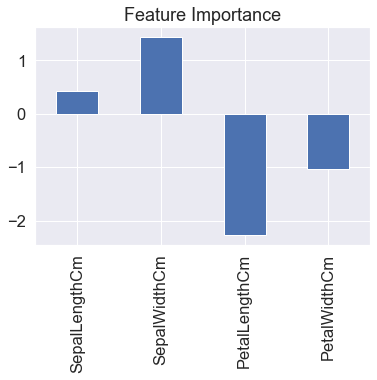

In [39]:
# Visualise feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

### Thank you